In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cat-in-the-dat/sample_submission.csv
/kaggle/input/cat-in-the-dat/train.csv
/kaggle/input/cat-in-the-dat/test.csv


In [2]:
data_path = '/kaggle/input/cat-in-the-dat/'

train = pd.read_csv(data_path + 'train.csv', index_col='id')
test = pd.read_csv(data_path + 'test.csv', index_col='id')
submission = pd.read_csv(data_path + 'sample_submission.csv', index_col='id')

Tutorial Link -> https://www.kaggle.com/code/werooring/ch7-eda

In [3]:
train.shape, test.shape

((300000, 24), (200000, 23))

In [4]:
train.head().T

id,0,1,2,3,4
bin_0,0,0,0,0,0
bin_1,0,1,0,1,0
bin_2,0,0,0,0,0
bin_3,T,T,F,F,F
bin_4,Y,Y,Y,Y,N
nom_0,Green,Green,Blue,Red,Red
nom_1,Triangle,Trapezoid,Trapezoid,Trapezoid,Trapezoid
nom_2,Snake,Hamster,Lion,Snake,Lion
nom_3,Finland,Russia,Russia,Canada,Canada
nom_4,Bassoon,Piano,Theremin,Oboe,Oboe


In [5]:
submission.head()

,target
id,
300000,0.5
300001,0.5
300002,0.5
300003,0.5
300004,0.5


**Feature Summary**

In [6]:
def resumetable(df):
    print(f'shape of data set: {df.shape}')
    summary = pd.DataFrame(df.dtypes, columns = ['data type'])
    summary = summary.reset_index()
    summary = summary.rename(columns = {'index': 'feature'}) # rename 'index' col to 'feature'
    summary['missing value count'] = df.isnull().sum().values
    summary['unique value count'] = df.nunique().values
    summary['first val'] = df.loc[0].values
    summary['second val'] = df.loc[1].values
    summary['third val'] = df.loc[2].values
    
    return summary

resumetable(train)

shape of data set: (300000, 24)


,feature,data type,missing value count,unique value count,first val,second val,third val
0,bin_0,int64,0,2,0,0,0
1,bin_1,int64,0,2,0,1,0
2,bin_2,int64,0,2,0,0,0
3,bin_3,object,0,2,T,T,F
4,bin_4,object,0,2,Y,Y,Y
5,nom_0,object,0,3,Green,Green,Blue
6,nom_1,object,0,6,Triangle,Trapezoid,Trapezoid
7,nom_2,object,0,6,Snake,Hamster,Lion
8,nom_3,object,0,6,Finland,Russia,Russia
9,nom_4,object,0,4,Bassoon,Piano,Theremin


**Understanding Feature Summary**

In [7]:
for i in range(3):
    feature = 'ord_' + str(i)
    print(f'{feature} unique value: {train[feature].unique()}')

ord_0 unique value: [2 1 3]
ord_1 unique value: ['Grandmaster' 'Expert' 'Novice' 'Contributor' 'Master']
ord_2 unique value: ['Cold' 'Hot' 'Lava Hot' 'Boiling Hot' 'Freezing' 'Warm']


In [8]:
for i in range(3, 6):
    feature = 'ord_' + str(i)
    print(f'{feature} unique value: {train[feature].unique()}')

ord_3 unique value: ['h' 'a' 'i' 'j' 'g' 'e' 'd' 'b' 'k' 'f' 'l' 'n' 'o' 'c' 'm']
ord_4 unique value: ['D' 'A' 'R' 'E' 'P' 'K' 'V' 'Q' 'Z' 'L' 'F' 'T' 'U' 'S' 'Y' 'B' 'H' 'J'
 'N' 'G' 'W' 'I' 'O' 'C' 'X' 'M']
ord_5 unique value: ['kr' 'bF' 'Jc' 'kW' 'qP' 'PZ' 'wy' 'Ed' 'qo' 'CZ' 'qX' 'su' 'dP' 'aP'
 'MV' 'oC' 'RL' 'fh' 'gJ' 'Hj' 'TR' 'CL' 'Sc' 'eQ' 'kC' 'qK' 'dh' 'gM'
 'Jf' 'fO' 'Eg' 'KZ' 'Vx' 'Fo' 'sV' 'eb' 'YC' 'RG' 'Ye' 'qA' 'lL' 'Qh'
 'Bd' 'be' 'hT' 'lF' 'nX' 'kK' 'av' 'uS' 'Jt' 'PA' 'Er' 'Qb' 'od' 'ut'
 'Dx' 'Xi' 'on' 'Dc' 'sD' 'rZ' 'Uu' 'sn' 'yc' 'Gb' 'Kq' 'dQ' 'hp' 'kL'
 'je' 'CU' 'Fd' 'PQ' 'Bn' 'ex' 'hh' 'ac' 'rp' 'dE' 'oG' 'oK' 'cp' 'mm'
 'vK' 'ek' 'dO' 'XI' 'CM' 'Vf' 'aO' 'qv' 'jp' 'Zq' 'Qo' 'DN' 'TZ' 'ke'
 'cG' 'tP' 'ud' 'tv' 'aM' 'xy' 'lx' 'To' 'uy' 'ZS' 'vy' 'ZR' 'AP' 'GJ'
 'Wv' 'ri' 'qw' 'Xh' 'FI' 'nh' 'KR' 'dB' 'BE' 'Bb' 'mc' 'MC' 'tM' 'NV'
 'ih' 'IK' 'Ob' 'RP' 'dN' 'us' 'dZ' 'yN' 'Nf' 'QM' 'jV' 'sY' 'wu' 'SB'
 'UO' 'Mx' 'JX' 'Ry' 'Uk' 'uJ' 'LE' 'ps' 'kE' 'MO' 'kw' 'yY' 

In [9]:
print('day unique value:', train['day'].unique())
print('month unique value:', train['month'].unique())
print('target unique value:', train['target'].unique())

day unique value: [2 7 5 4 3 1 6]
month unique value: [ 2  8  1  4 10  3  7  9 12 11  5  6]
target unique value: [0 1]


## Visualizing Data

In [10]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

**Target Distribution**

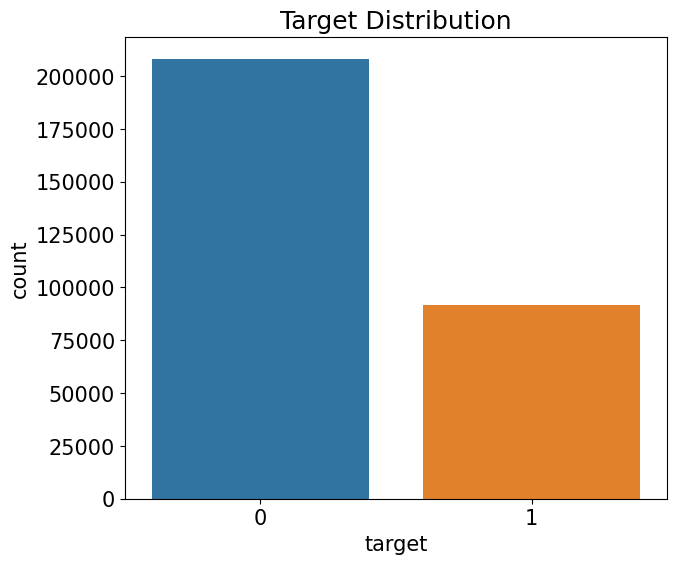

In [11]:
mpl.rc('font', size=15) 
plt.figure(figsize=(7, 6)) 

# apply count plot
ax = sns.countplot(x='target', data=train)
ax.set(title='Target Distribution');

In [12]:
# first rectangle object
rectangle = ax.patches[0] 
print('hight:', rectangle.get_height())
print('width:', rectangle.get_width())
print('left side x pos:', rectangle.get_x())

hight: 208236.0
width: 0.8
left side x pos: -0.4


In [13]:
# to put text above each bar
print('x pos for text:', rectangle.get_x() + rectangle.get_width()/2.0)
print('y pos for text:', rectangle.get_height() + len(train)*0.001)

x pos for text: 0.0
y pos for text: 208536.0


Text(0.5, 1.0, 'Target Distribution')

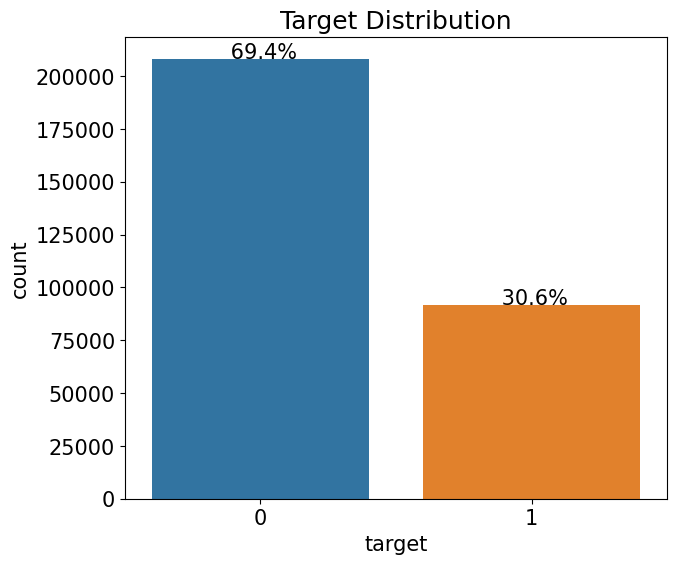

In [14]:
# write percentage of target over bars
def write_percent(ax, total_size):
    for patch in ax.patches:
        height = patch.get_height()
        width = patch.get_width()
        left_coord = patch.get_x()
        percent = height / total_size * 100
            
        ax.text(x = left_coord + width / 2.0,    # x pos
                y = height + total_size * 0.001, # y pos
                s = f'{percent: 1.1f}%',         # text
                ha = 'center')                   # align to center

plt.figure(figsize = (7, 6))

ax = sns.countplot(x = 'target', data = train)
write_percent(ax, len(train))
ax.set_title('Target Distribution')

**Binary Feature Distribution**

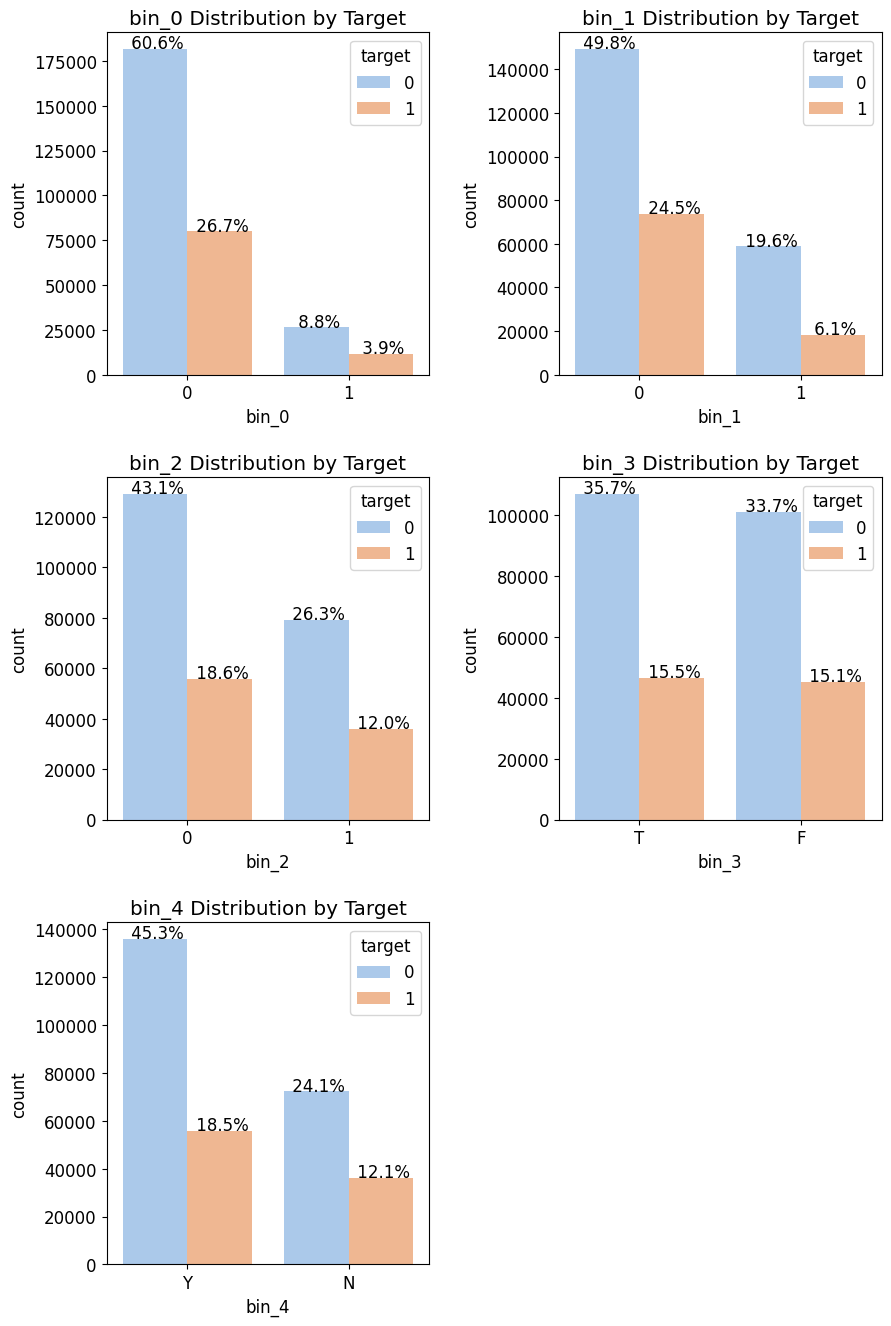

In [15]:
import matplotlib.gridspec as gridspec 

# 3 row x 2 col figure
mpl.rc('font', size = 12)
grid = gridspec.GridSpec(3, 2) # each sub plot (graph): 3 x 2 displayed
plt.figure(figsize = (10, 16)) # entire figure size
plt.subplots_adjust(wspace = 0.4, hspace = 0.3) # surrounded space btw sub plots

# draw sub plot
bin_features = ['bin_0', 'bin_1', 'bin_2', 'bin_3', 'bin_4'] 

for idx, feature in enumerate(bin_features):
    ax = plt.subplot(grid[idx])
    
    sns.countplot(x = feature, 
                  data = train,
                  hue = 'target',
                  palette = 'pastel',
                  ax = ax)
    ax.set_title(f'{feature} Distribution by Target')
    write_percent(ax, len(train))   

**Nominal Feature Distribution**

- nominal: categorical variables that have discrete categories without any inherent order. Examples include gender, country, or product categories

**Step 1: Creating a Crosstabulation Table Function**

- Crosstabulation: Contingency table or cross-tabulation that shows the frequency distribution of variables. Crosstab tables are often used to compare how different categories of a nominal feature relate to another variable. For instance, comparing the relationship between gender and product purchases
- Crosstabulation analysis is commonly used in exploratory data analysis (EDA) to see how the values of one categorical feature correlate with another.

In [16]:
pd.crosstab(train['nom_0'], train['target'])

target,0,1
nom_0,,
Blue,72914,23252
Green,85682,41659
Red,49640,26853


In [17]:
# normalization -> convert to percentage
crosstab = pd.crosstab(train['nom_0'], train['target'], normalize='index')*100
crosstab

target,0,1
nom_0,,
Blue,75.820976,24.179024
Green,67.285478,32.714522
Red,64.894827,35.105173


In [18]:
# reset index
crosstab = crosstab.reset_index() 
crosstab

target,nom_0,0,1
0,Blue,75.820976,24.179024
1,Green,67.285478,32.714522
2,Red,64.894827,35.105173


In [19]:
def get_crosstab(df, feature):
    crosstab = pd.crosstab(df[feature], df['target'], normalize='index')*100
    crosstab = crosstab.reset_index()
    return crosstab

In [20]:
crosstab = get_crosstab(train, 'nom_0')
crosstab

target,nom_0,0,1
0,Blue,75.820976,24.179024
1,Green,67.285478,32.714522
2,Red,64.894827,35.105173


In [21]:
crosstab[1]

0    24.179024
1    32.714522
2    35.105173
Name: 1, dtype: float64

**Step 2: Creating a Point Plot Ploting Function**

In [22]:
def plot_pointplot(ax, feature, crosstab):
    ax2 = ax.twinx() # new axis that share x-axis, but not y-axis
    
    # plot point plot on new axis
    ax2 = sns.pointplot(x = feature, y = 1, data = crosstab,
                        order = crosstab[feature].values, 
                        color = 'black')
    ax2.set_ylim(crosstab[1].min()-5, crosstab[1].max()*1.1) # setting y-axis range
    ax2.set_ylabel('Target 1 Ratio(%)')

**Step 3: Creating a Function that Generates Plots to Analyze Feature Distributions and the Proportion of Target Values within Each Feature** <br>
(피처 분포도 및 피처별 타깃값 1의 비율 포인트플롯 생성 함수 만들기)

In [23]:
def plot_cat_dist_with_true_ratio(df, features, num_rows, num_cols, size = (15, 20)):
    plt.figure(figsize=size) # set entire figure size
    grid = gridspec.GridSpec(num_rows, num_cols) # display sub plot
    plt.subplots_adjust(wspace = 0.45, hspace = 0.3) # surrounded space btw sub plots
    
    for idx, feature in enumerate(features):
        ax = plt.subplot(grid[idx])
        crosstab = get_crosstab(df, feature) # create crosstab
        
        # draw target distribution count plot at ax-axis
        sns.countplot(x = feature, data = df, 
                      order = crosstab[feature].values,
                      color = 'skyblue', 
                      ax = ax)
        
        write_percent(ax, len(df))
        
        plot_pointplot(ax, feature, crosstab)
        
        ax.set_title(f'{feature} Dsitribution')

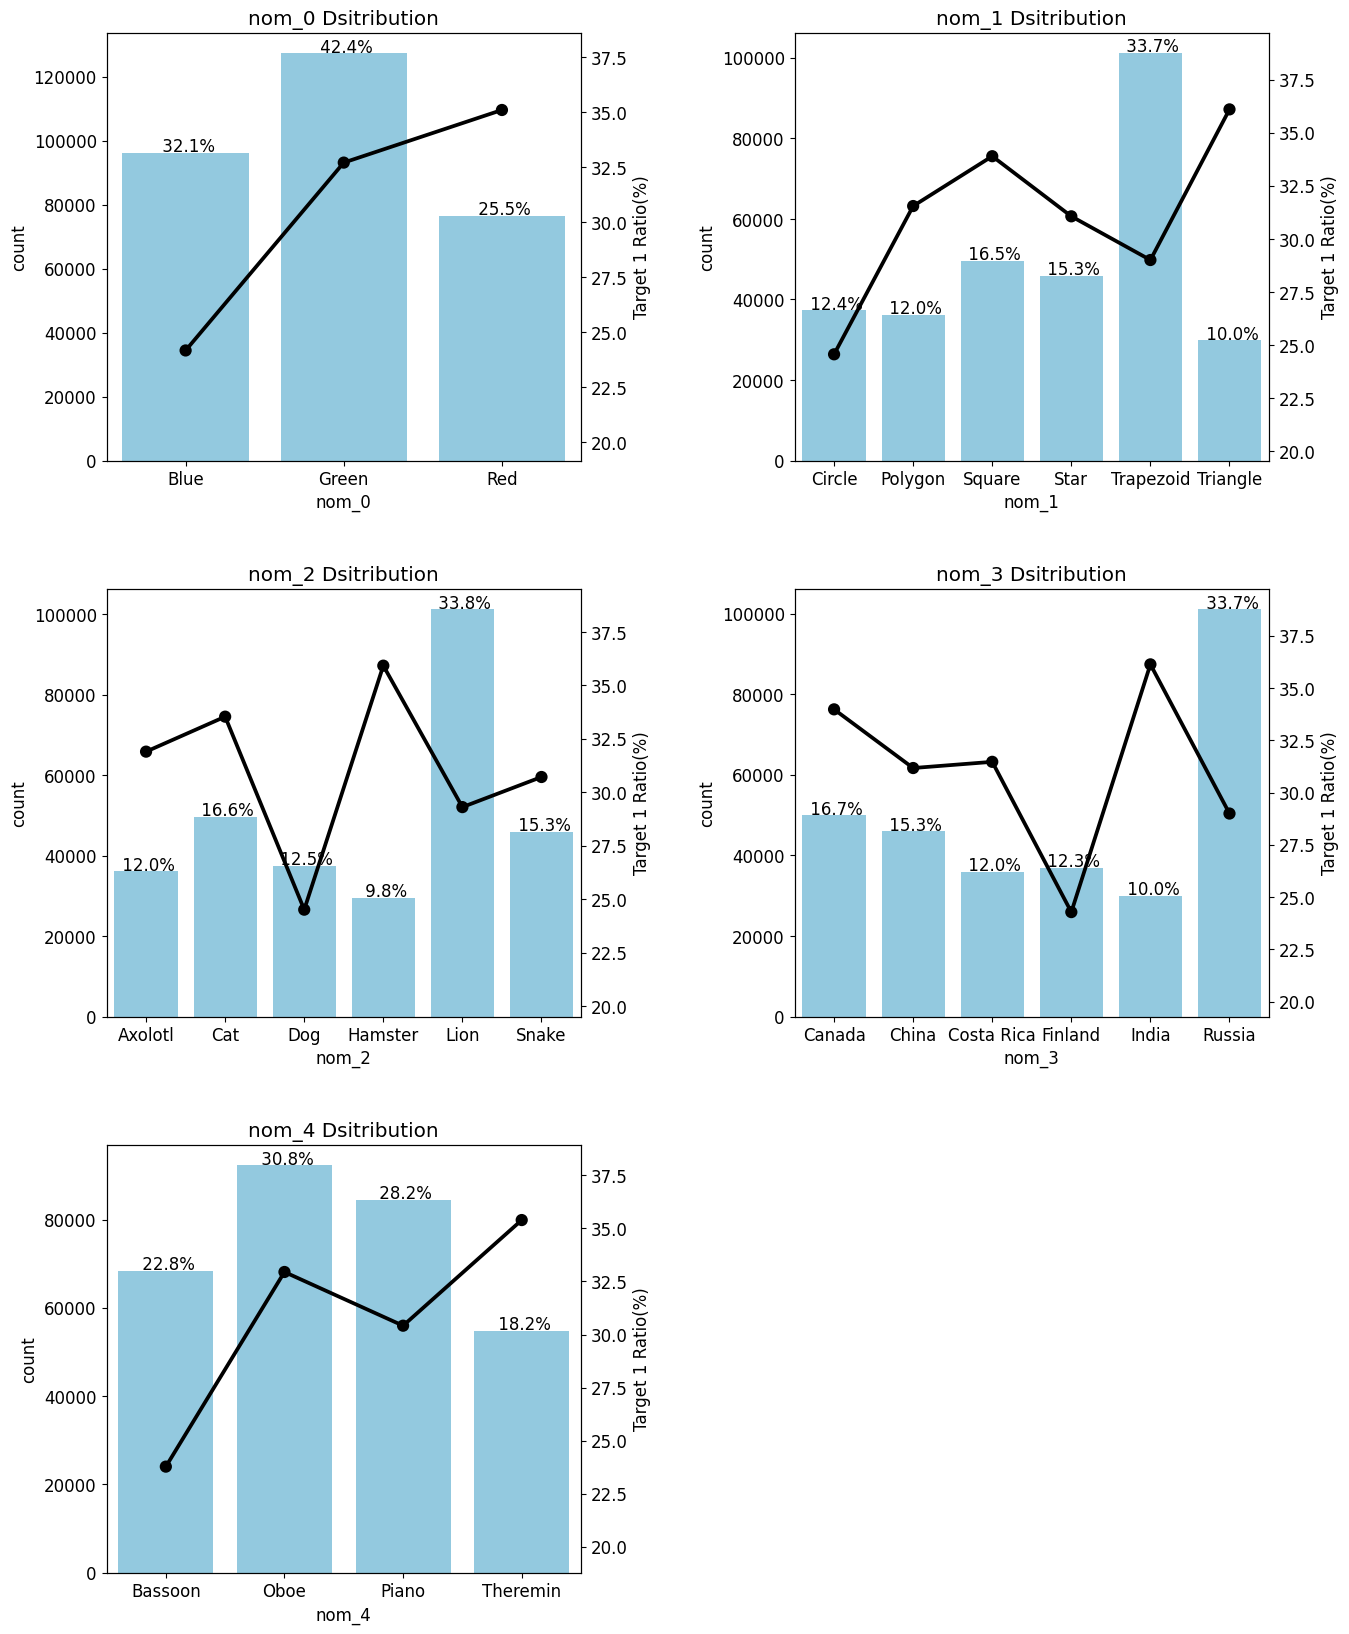

In [24]:
nom_features = ['nom_0', 'nom_1', 'nom_2', 'nom_3', 'nom_4'] # nominal feature
plot_cat_dist_with_true_ratio(train, nom_features, num_rows=3, num_cols=2)

**Order Feature Distribution**

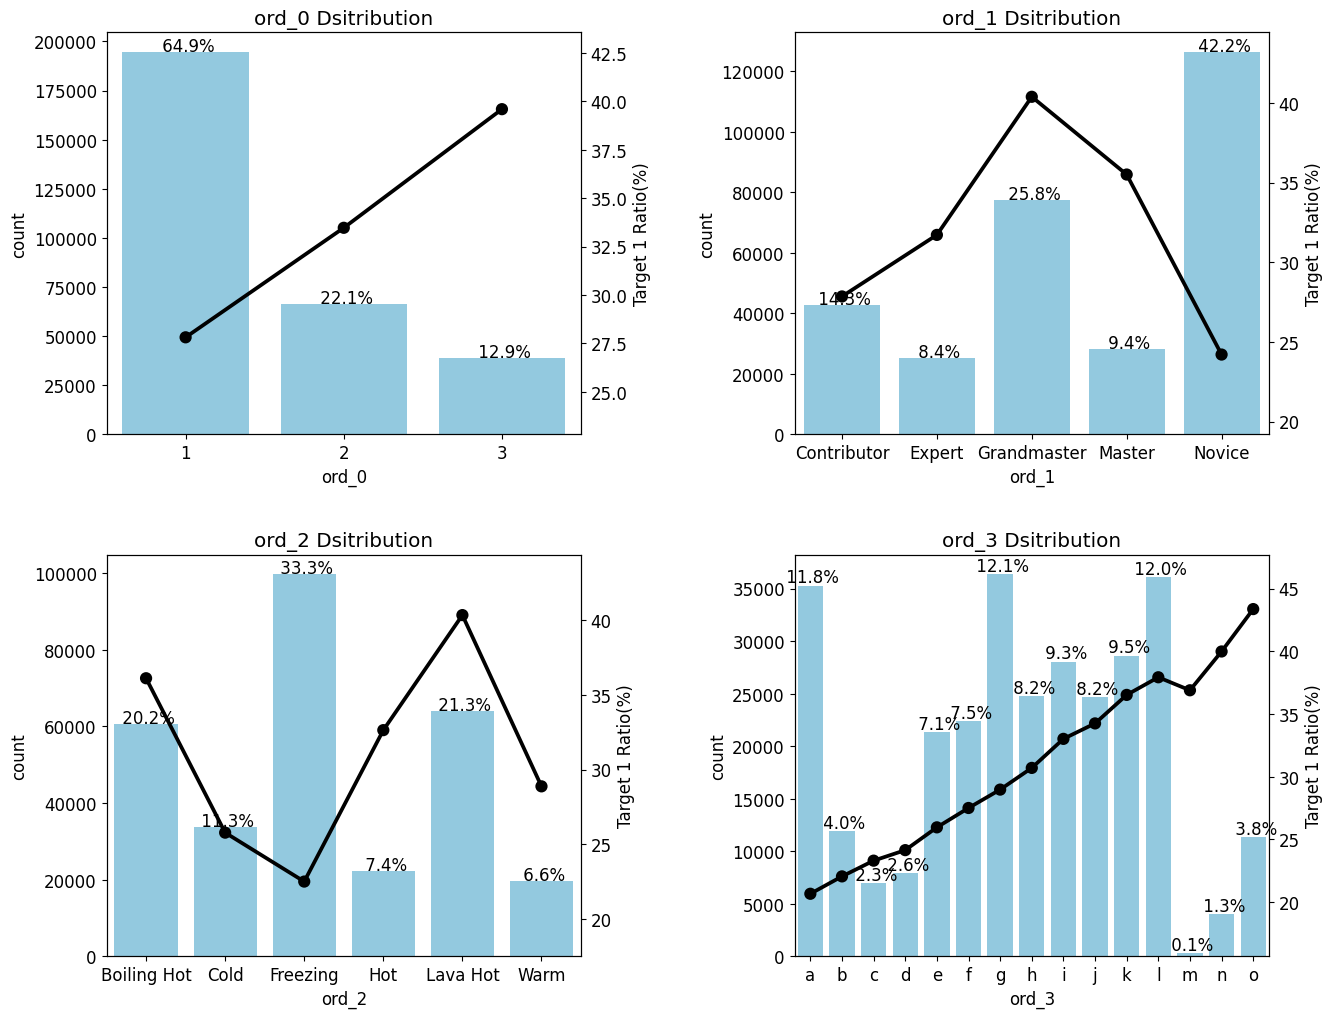

In [25]:
ord_features = ['ord_0', 'ord_1', 'ord_2', 'ord_3'] # 순서형 피처
plot_cat_dist_with_true_ratio(train, ord_features, 
                              num_rows=2, num_cols=2, size=(15, 12))

In [26]:
from pandas.api.types import CategoricalDtype 

ord_1_value = ['Novice', 'Contributor', 'Expert', 'Master', 'Grandmaster']
ord_2_value = ['Freezing', 'Cold', 'Warm', 'Hot', 'Boiling Hot', 'Lava Hot']

# ordered categorical data type
ord_1_dtype = CategoricalDtype(categories=ord_1_value, ordered=True)
ord_2_dtype = CategoricalDtype(categories=ord_2_value, ordered=True)

# change data type
train['ord_1'] = train['ord_1'].astype(ord_1_dtype)
train['ord_2'] = train['ord_2'].astype(ord_2_dtype)

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_

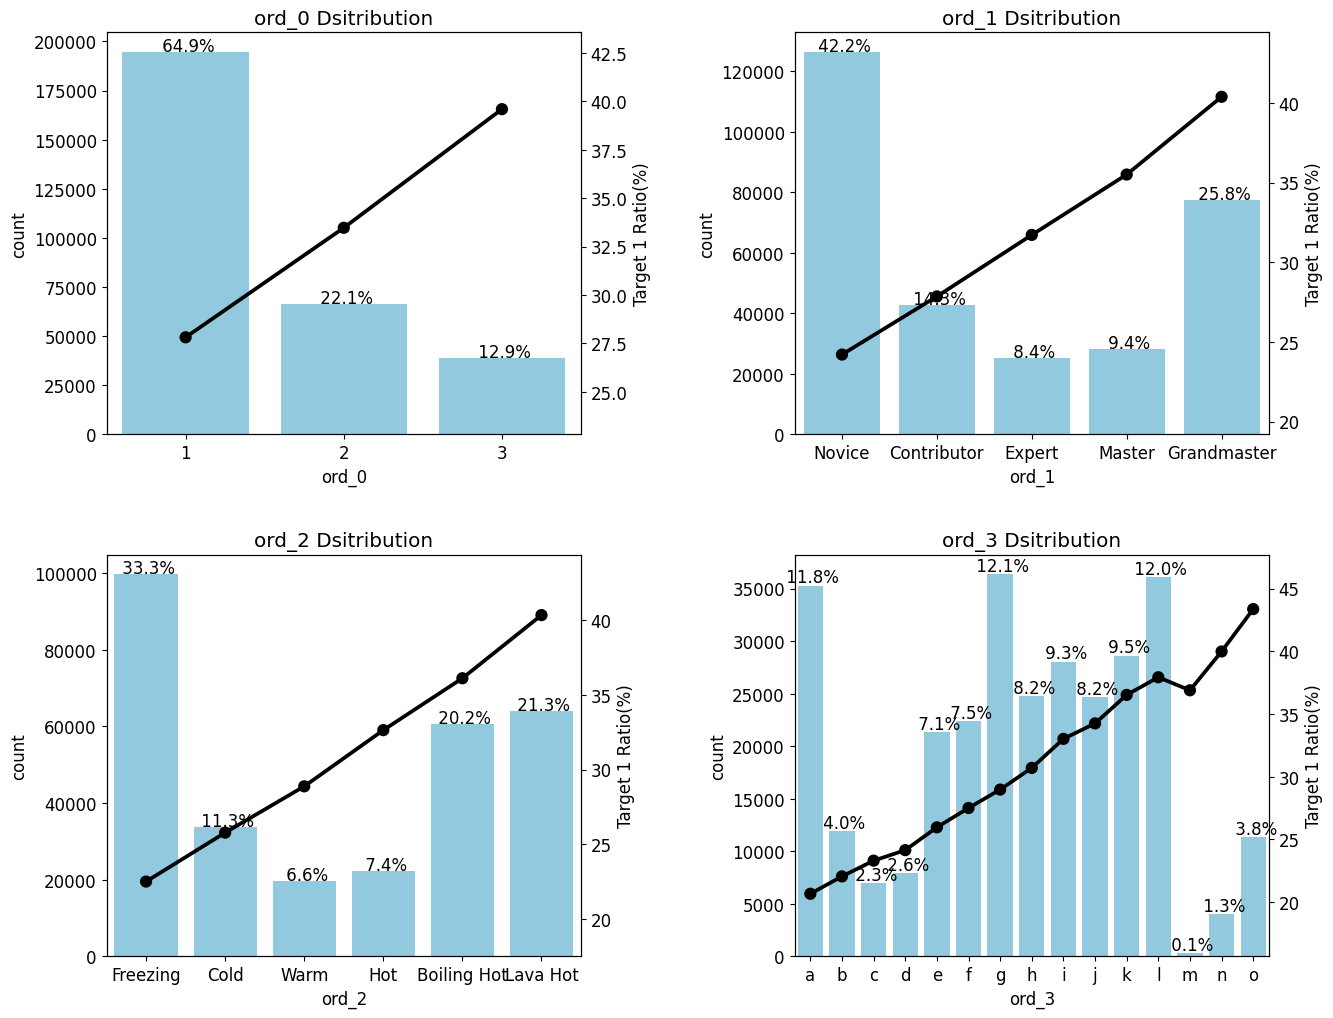

In [27]:
plot_cat_dist_with_true_ratio(train, ord_features, 
                              num_rows=2, num_cols=2, size=(15, 12))

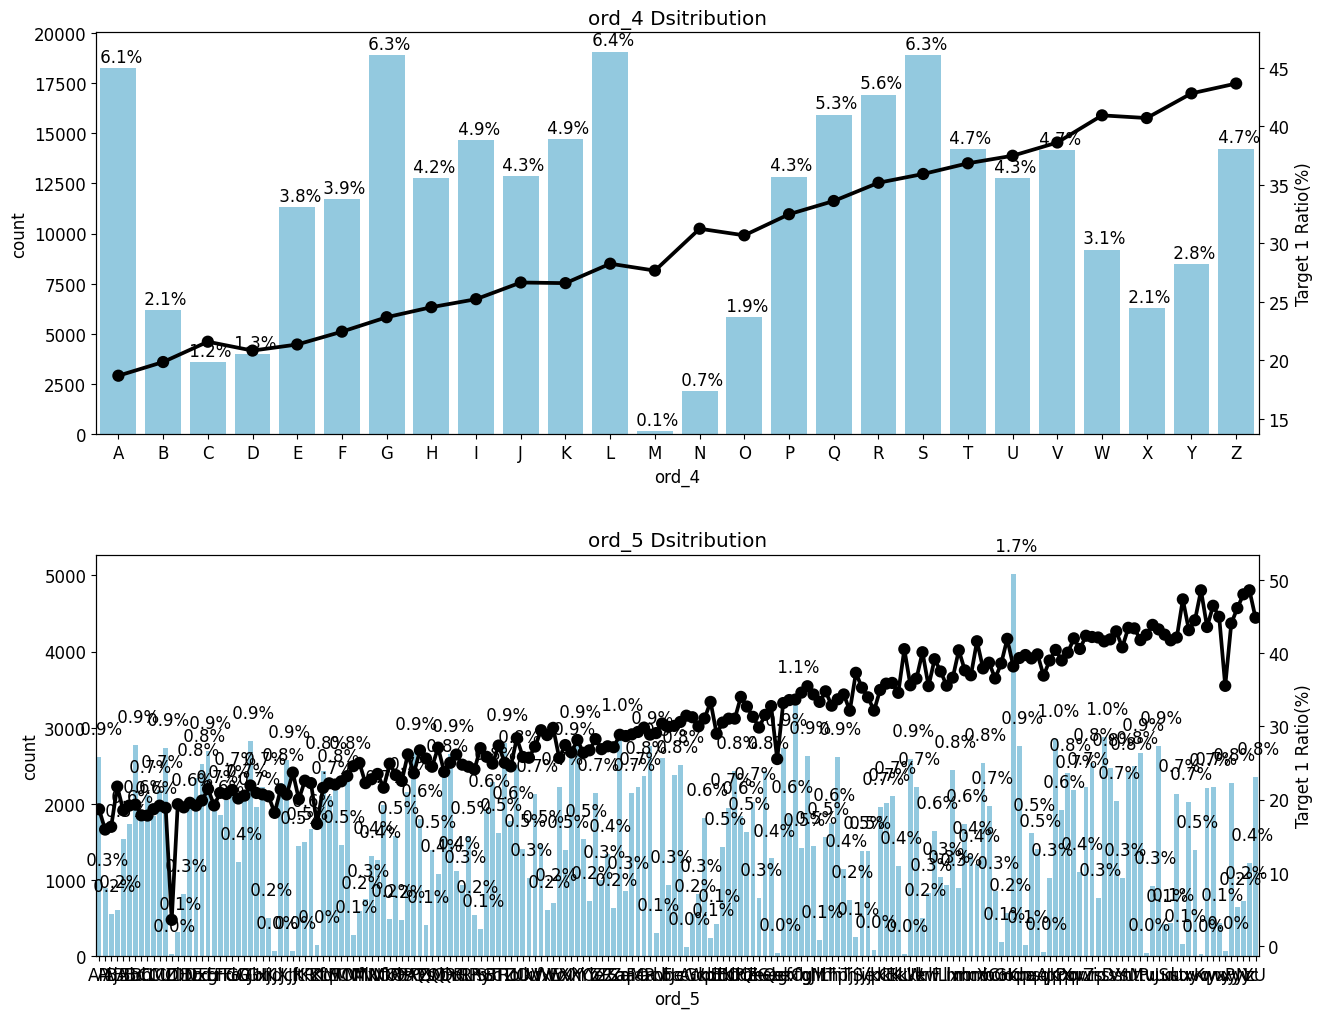

In [28]:
plot_cat_dist_with_true_ratio(train, ['ord_4', 'ord_5'], 
                              num_rows=2, num_cols=1, size=(15, 12))

**Weather feature distribution**

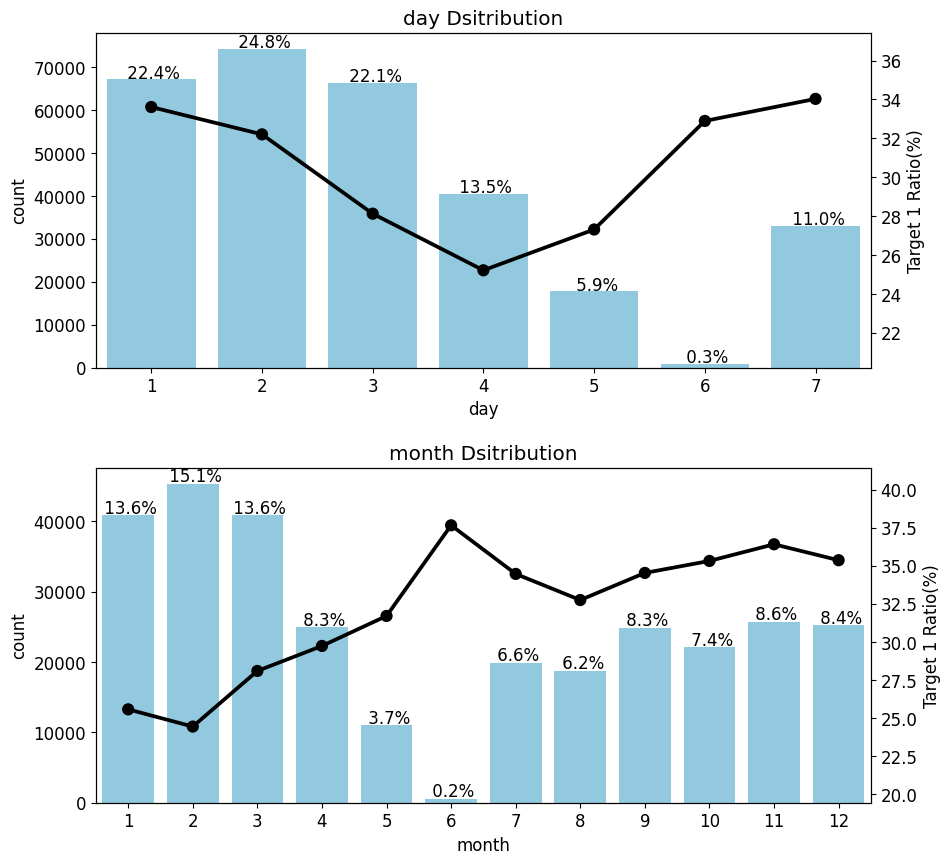

In [29]:
date_features = ['day', 'month']
plot_cat_dist_with_true_ratio(train, date_features, 
                              num_rows=2, num_cols=1, size=(10, 10))